# Coordenadas Polares

A continuación se presenta una manera de trabajar con coordenadas polares en Python. Básicamente lo que se hará es mostrar cómo graficar emulando estas coordenadas en Matplotlib y posteriormente cómo graficar de manera paramétrica.

## Funciones Seno y Coseno

Primero recordemos las gráficas de las funciones seno y coseno, así como algunas relaciones entre ellas. Para esto, como siempre, hay que importar los módulos necesarios para graficar. En este caso: `Matplotlib` y `NumPy`. (Para más detalles sobre cómo utilizar este módulo ver el notebook [`3_2_Matplotlib_2D.ipynb`](https://github.com/HaydeePeruyero/Geometria-Analitica-1/blob/master/3_2_Matplotlib_2D.ipynb))

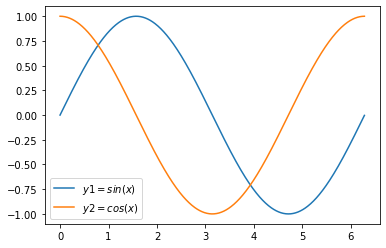

In [3]:
import matplotlib.pyplot as mplt
import numpy as np

x = np.arange(0,2*np.pi,0.01) 

y1 = np.sin(x)
y2 = np.cos(x)

mplt.plot(x, y1, label='$y1 = sin(x)$')
mplt.plot(x, y2, label='$y2 = cos(x)$')
mplt.legend()
mplt.show()

Como podemos observar en el plano anterior las gráficas de las funciones seno y coseno son 'muy' parecidas. De hecho, parecen solamente estar 'desfasadas'. En efecto, como veremos a continuación, podemos obtener la gráfica de una ellas en términos de la otra 'ajustando' apropiadamente el respectivo argumento. En otras palabras, este ajuste rectifica el desfase entre las gráficas.

Como primer caso veamos que **$\hspace{2pt}\cos\big(x - \frac{\pi}{2}\big) = \sin(x)$:**

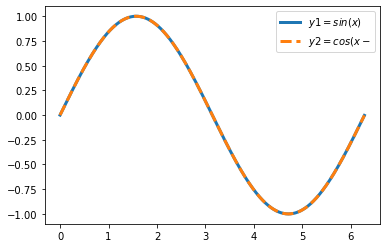

In [4]:
import matplotlib.pyplot as mplt
import numpy as np

y1 = np.sin(x)
y2 = np.cos(x - np.pi/2)

mplt.plot(x, y1, label='$y1 = sin(x)$', linewidth = 3) # Con linewidth ajustamos el grosor de la gráfica
mplt.plot(x, y2, label='$y2 = cos(x-\frac{\pi}{2})$', linestyle = '--', linewidth = 3) # Con linestyle ajustamos el estilo de trazo de la gráfica
mplt.legend()
mplt.show()

Ahora, veamos que **$\hspace{2pt}\sin\big(x + \frac{\pi}{2}\big) = \cos(x)$:**

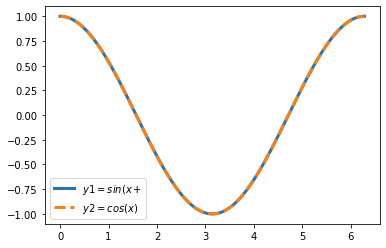

In [5]:
import matplotlib.pyplot as mplt
import numpy as np

x = np.arange(0,2*np.pi,0.01) 

y1 = np.sin(x + np.pi/2)
y2 = np.cos(x)

mplt.plot(x, y1, label='$y1 = sin(x + \frac{\pi}{2})$', linewidth = 3)
mplt.plot(x, y2, label='$y2 = cos(x)$', linestyle = '--', linewidth = 3)
mplt.legend()
mplt.show()

# Coordenadas Polares

Las coordenadas polares o sistemas polares son un sistema de coordenadas 2-dimensionales en el que cada punto del plano se determina por una distancia y un ángulo, denotados usualmente por $r$ y $\theta$, respectivamente. Las distancias y los ángulos son con respecto a un punto llamado origen y un eje horizontal llamado eje polar.

## Conversión entre Coordenadas Polares y Cartesianas

Cuando se tienen dos sistemas coordenados para un mismo espacio resulta natural el preguntarse si existe una manera de 'pasar' de una a otra. Para el caso del plano $\mathbb{R}^{2}$, es sabido que las fórmulas para obtener las coordenadas cartesianas $(x,y)$ de un punto $(r_{0},\theta_{0})$ en coordenadas polares son:
    \begin{align*}
        x &= r_{0}\cos(\theta_{0}), \\
        y &= r_{0}\sin(\theta_{0}).
    \end{align*}
    
Recíprocamente, las fórmulas para obtener las coordenadas polares $(r,\theta)$ de un punto $(x_{0},y_{0})$ en coordenadas cartesianas son:
    \begin{align*}
        r &= \sqrt{x_{0}^2+y_{0}^2}, \\
        \theta &= \arctan{\frac{y_{0}}{x_{0}}}.
    \end{align*}

Utilizando el módulo de `SymPy` podemos construir una función en Python que nos ayude a hacer estas conversiones:

In [0]:
#import numpy as np
import sympy as sym

def polar_to_cartesian(r, theta): # 'def' nos permite 'crear' nuestras propias funciones en Python.
   xx = r * sym.cos(theta)
   yy = r * sym.sin(theta)
   return(xx, yy)

def cartesian_to_polar(x, y): 
   rr = sym.sqrt(x**2 + y**2)
   theta = sym.atan2(y, x)
   return(rr, theta)

**Nota:** Estas funciones se pueden construir utilizando solamente el módulo de `NumPy`. Sin embargo, se han escrito así para cuestiones de ilustraciones por el problema de redondeo que se presenta al utilizar solamente `NumPy`.


Veamos ahora algunos ejemplos de cómo utilizar estas funciones.

In [0]:
# De polares a cartesianas:

# mprint(polar_to_cartesian(1, 0))
# print(polar_to_cartesian(1, sym.pi/4))
# print(polar_to_cartesian(1, sym.pi))
# print(polar_to_cartesian(1, 3*sym.pi/2))
# print(polar_to_cartesian(1, 2*sym.pi))

(1, 0)


In [0]:
# De cartesianas a polares:

#print(cartesian_to_polar(1, 0))
#print(cartesian_to_polar(0, 1))
#print(cartesian_to_polar(-1, 0))
#print(cartesian_to_polar(0, -1))

(1, -pi/2)


## Plano Polar

Un Plano Polar es un plano que contiene como referencias ángulos y magnitudes, lo cual nos permite representar un punto en 2-dimensiones conociendo sus coordenadas polares. Este plano consiste de circunferencias concéntricas a un origen y rectas concurrentes a este con distintos ángulos de inclinación.

En `Matplotlib` podemos trabajar con planos polares utilizando la instrucción (instancia):

In [0]:
import matplotlib.pyplot as mplt
import numpy as np

ax = mplt.subplot(111, projection='polar')

Análogamente al caso cartesiano, podemos definir relaciones funcionales entre las 'variables polares'. Es común pensar, por ejemplo, a la variable $\theta$ como función de $r$, es decir, $\hspace{2pt}\theta=\theta(r)$. Lo que nos permite plasmar ciertas gráficas (muy estéticas) en el plano que no se pueden obtener de manera inmediata utilizando coordenadas cartesianas.

Una de las funciones básicas a tener siempre en mente es la función indentidad: $\hspace{2pt}\theta = r$:

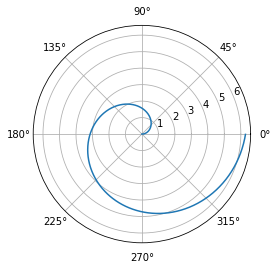

In [8]:
import matplotlib.pyplot as mplt
import numpy as np

ax = mplt.subplot(111, projection='polar')

r1 = np.arange(0, 2*np.pi, 0.01)
theta1 = r1

mplt.polar(r1, theta1)
mplt.show()

Ahora, una función cuadrática en el radio $\hspace{2pt}\theta = r^2$. A partir de este ejemplo debemos tomar en cuenta que la variable $r$ puede tomar valores negativos:

In [0]:
import matplotlib.pyplot as mplt
import numpy as np

ax = mplt.subplot(111, projection='polar')

r2 = np.arange(0, 3*np.pi, 0.01)
theta2 = r2**2

mplt.polar(r2, theta2)
mplt.show()

Al parecer existe cierta similitud entre las gráficas anteriores aunque éstas provengan de dos funciones distintas.

**Ejercicio 1:** Describa qué figura cree que dibuje la gráfica de cada una de las funciones anteriores conforme aumentamos la magnitud de $r$. ¿Se parecen?

**Ejercicio 2:** Grafique cada una de las funciones anteriores multiplicadas por $-1$, es decir, para la primera función grafique $\theta(r)=-r$, etc. Describa la figura que dibuja cada una de estas gráficas conforme aumenta la magnitud de $r$ y compárelas con las respectivas gráficas 'originales'. ¿Qué observa?

Como mencionamos anteriormente, la variable radial $r$ admite valores negativos. Veamos qué sucede con cada una de las gráficas anteriores si asignamos tales valores a $r$.

$\theta = r$:

In [0]:
import matplotlib.pyplot as mplt
import numpy as np

ax = mplt.subplot(111, projection='polar')

r11 = np.arange(-2*np.pi, 2*np.pi, 0.01)
theta11 = r11

mplt.polar(r11, theta11)
mplt.show()

$\theta = r^2$:

In [0]:
import matplotlib.pyplot as mplt
import numpy as np

ax = mplt.subplot(111, projection='polar')

r21 = np.arange(-3*np.pi, 3*np.pi, 0.01)
theta21 = r21**2

mplt.polar(r21, theta21)
mplt.show()

## Más Gráficas

A continuación, se presentan algunos ejemplos de funciones que generan estéticos gráficos en el plano polar. Para las gráficas anteriores, se tomó a la variable angular $\theta$ como función de la variable radial $r$. Pero también es posible intercambiar estos roles.

$r=\cos(n\theta)$, $n=2,3$:

In [0]:
import matplotlib.pyplot as mplt
import numpy as np

ax = mplt.subplot(111, projection='polar')

theta3 = np.linspace(0,2*np.pi,10000) # linspace divide el intervalo (0, 2pi) en 10000 partes iguales
r3 = np.cos(2*theta3)
r4 = np.cos(3*theta3)

mplt.polar(theta3, r3, label='$r=\cos(2\\theta)$')
mplt.polar(theta3, r4, label='$r=\cos(3\\theta)$')
ax.set_rticks([1, 2]) # Con esta instrucción ajusto el número de círculos y el radio correspondiente a visulizar en el plano polar
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1)) # Con esta instrucción modifico el lugar a imprimir la leyenda
mplt.show()

**Ejercicio 3:** Deduzca qué figura dibujará la gráfica de la función $\hspace{2pt}r=cos(n\theta)$, para $\hspace{2pt}n \in \mathbb{N}$.

$r=\sin(n\theta)$, $n=2,3$:

In [0]:
import matplotlib.pyplot as mplt
import numpy as np

ax = mplt.subplot(111, projection='polar')

theta5 = np.linspace(0,2*np.pi,10000) 
r5 = np.sin(2*theta5)
r6 = np.sin(3*theta5)

mplt.polar(theta5, r5, label='$r=\sin(2\\theta)$')
mplt.polar(theta5, r6, label='$r=\sin(3\\theta)$')
ax.set_rticks([1, 2]) 
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1)) 
mplt.show()

**Ejercicio 3:** Deduzca qué figura dibujará la gráfica de la función $\hspace{2pt}r=sin(n\theta)$, para $\hspace{2pt}n \in \mathbb{N}$.